In [1]:
import os
CUDA_HOME="/usr/local/cuda"
os.environ['CUDA_HOME'] = CUDA_HOME

In [ ]:
import requests
from PIL import ImageDraw
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 

model_id = "../models/IDEA-Research/grounding-dino-base"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)




In [34]:
# VERY important: text queries need to be lowercased + end with a dot
image = Image.open("../sample-data/hurricane-florence_00000109_pre_disaster.png")
text = "roads."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)
# Draw bounding boxes on the image

draw = ImageDraw.Draw(image)
for result in results:
    for box, label in zip(result['boxes'], result['labels']):
        draw.rectangle(box.tolist(), outline="red", width=3)
        draw.text((box[0], box[1]), label, fill="red")

[{'scores': tensor([0.4906], device='cuda:0'),
  'labels': ['roads'],
  'boxes': tensor([[2.4585e+02, 2.6174e-01, 1.0212e+03, 2.3124e+02]], device='cuda:0')}]

[{'scores': tensor([0.4628], device='cuda:0'), 'labels': ['person'], 'boxes': tensor([[395.6729, 114.5200, 424.5325, 146.2192]], device='cuda:0')}]


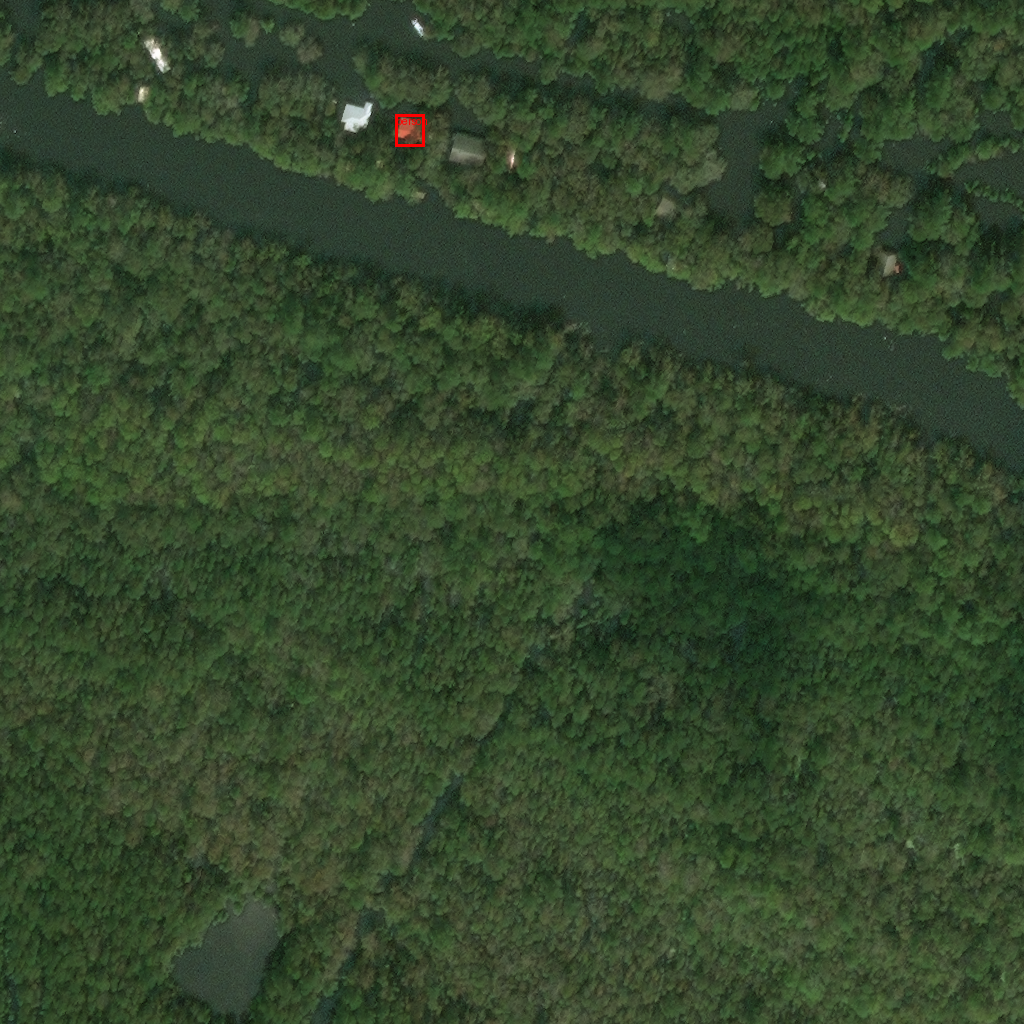

In [52]:

# Check for cats and remote controls
# VERY important: text queries need to be lowercased + end with a dot
image = Image.open("../sample-data/hurricane-florence_00000109_post_disaster.png")
# answer ="
# in the second image, there is a noticeable increase in the water level of the river,
# causing it to expand and flood the surrounding area. 
# the road that was previously visible is now submerged under water. 
# additionally, some buildings near the river appear to be partially or completely underwater due to the flooding. 
# the overall landscape shows more water coverage compared to the first image."
# text = "there is a noticeable increase in the water level of the river."
# text = "causing it to expand and flood the surrounding area."
# text = "the road that was previously visible is now submerged under water."
text = "person."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)
# Draw bounding boxes on the image
print(results)
draw = ImageDraw.Draw(image)
for result in results:
    for box, label in zip(result['boxes'], result['labels']):
        draw.rectangle(box.tolist(), outline="red", width=3)
        draw.text((box[0], box[1]), label, fill="red")
image